# **Phishing Website Detection by Machine Learning Techniques**

*Mini-project*

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

*This project is worked on Google Collaboratory.*<br>
*The required packages for this notebook are imported when needed.*

from google.colab import files


uploaded = files.upload()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving 5.urldata.csv to 5.urldata.csv


In [ ]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()

ValueError: ignored

## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Checking the shape of the dataset
data0.shape

NameError: ignored

In [ ]:
#Listing the features of the dataset
data0.columns

NameError: ignored

In [ ]:
#Information about the dataset
data0.info()

NameError: ignored

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

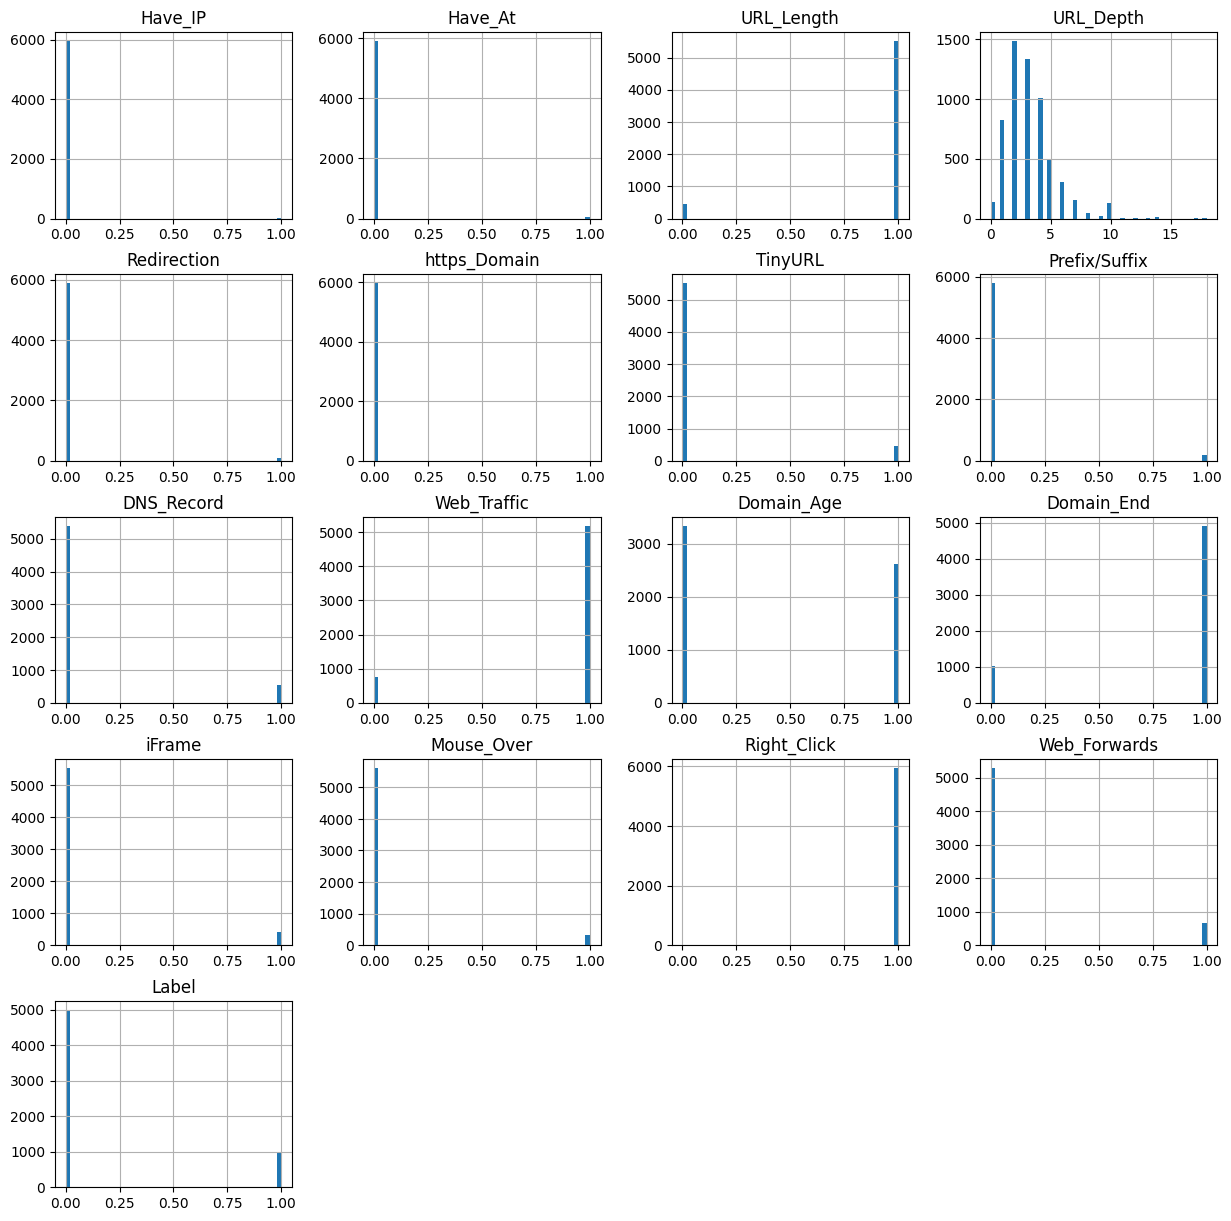

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-21-91fdee13ed62>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr())


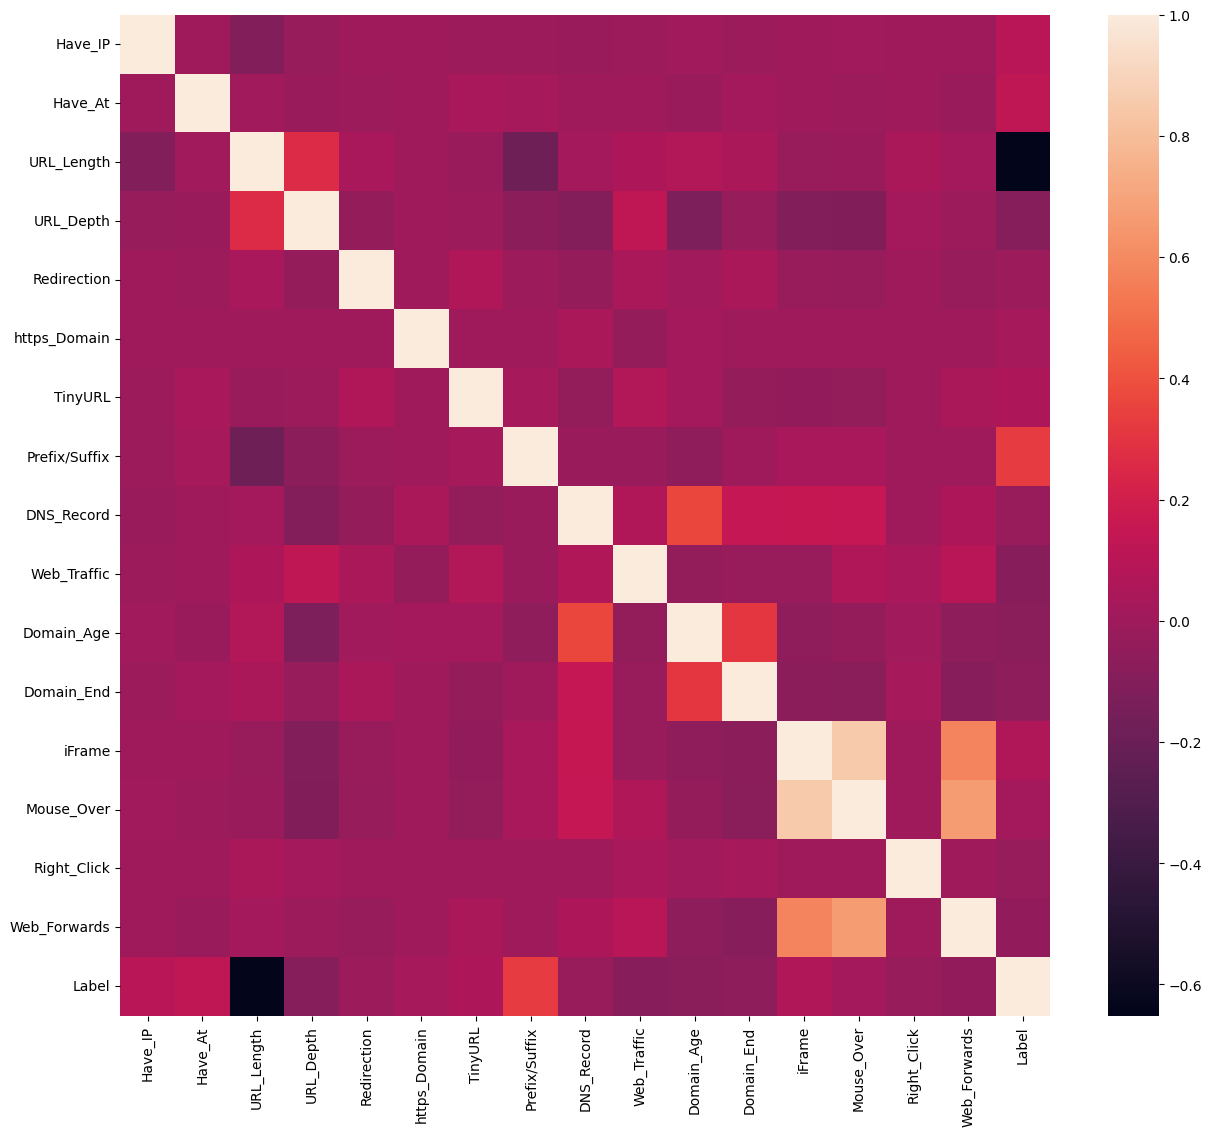

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000
mean,0.001846,0.010742,0.924807,3.243538,0.012756,0.000168,0.076032,0.029540,0.093152,0.871937,0.438570,0.826620,0.069319,0.055723,0.999832,0.111279,0.160792
std,0.042932,0.103093,0.263725,2.040040,0.112229,0.012955,0.265072,0.169329,0.290670,0.334188,0.496254,0.378608,0.254016,0.229406,0.012955,0.314504,0.367370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset.

In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((5958, 16), (5958,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((4766, 16), (1192, 16))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.930
Decision Tree: Accuracy on test Data: 0.934


NameError: ignored

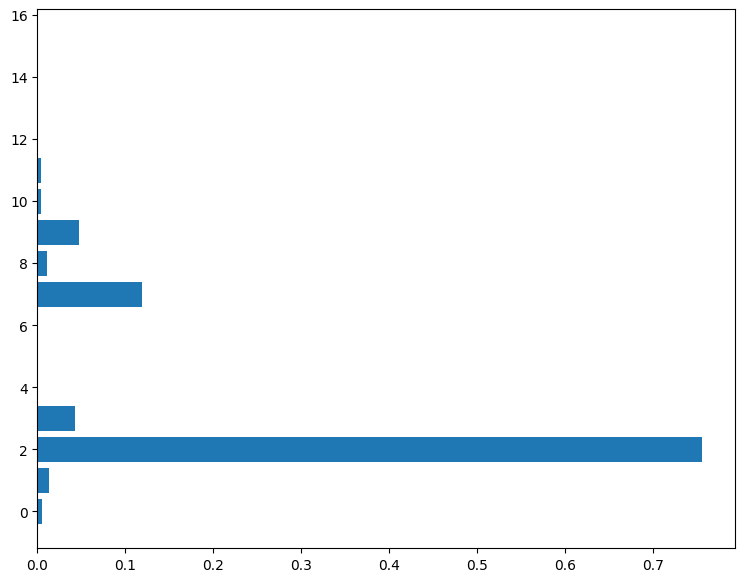

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.927
Random forest: Accuracy on test Data: 0.934


NameError: ignored

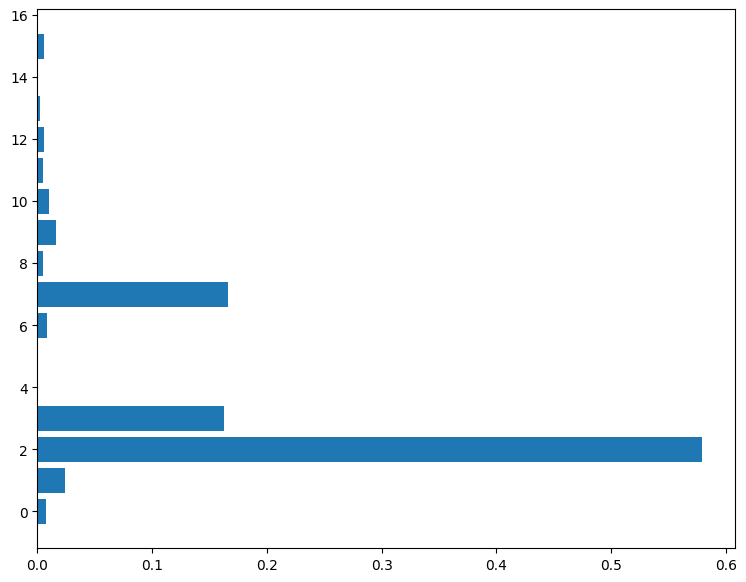

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.range(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.948
XGBoost : Accuracy on test Data: 0.946


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.930,0.934
1,Random Forest,0.927,0.934
2,XGBoost,0.948,0.946


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.948,0.946
0,Decision Tree,0.930,0.934
1,Random Forest,0.927,0.934


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

**Testing the saved model:**

In [ ]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/